In [1]:
import pandas as pd

## INTRUCTIONS: replace with you session_data.csv filepath
path = "C:/Users/Luciano/Downloads/session_data.csv"
## EXECUTE: Run ->


# Introduction:
## Purpose:
Analyze the provided dataset to uncover trends and patterns in user behavior. Develop a robust predictor for customer churn to enhance strategic decision-making.

## Dataset:
The dataset comprises anonymized data from past customers who purchased a plan and eventually churned. Each row represents a session upload, offering valuable insights into user interactions.
## Data Overview
Features:
* session_id: Unique identifier for each session.
* user_id: Unique identifier for each user.
* session_created: The date when the session was created.
* session_approved: Indicates whether the user approved the session as ready for their records.
* session_deleted: Indicates whether the user deleted the session (can occur before or after approval).
* session_duration_mins: Duration of the session in minutes.
* upload_from_phone: Indicates whether the session was uploaded from a mobile device.
* user_status: Indicates whether the user is active or has churned at the time of export.
* subscription_start: The start date of the user's subscription.
* subscription_end: The supposed end date of the user's subscription.

*Note: For churned users, this date is before the 7th of April 2023, and for active users, it is the end of their currently paid cycle.*

## Preprocessing Steps:
* Users with a subscription_end before the 7th of April 2023 were considered churned.
* Null observations in the 'session_duration_mins' column were dropped from the analysis.

### Some context
With the objective of optimizing the churn predictor's technical approach, the initial choice was a Random Forest algorithm; an established solution known for its effectiveness in addressing classification problems. A challenge surfaced, however, due to the inherent data imbalance, where non-churners outnumber churners. I explored several strategies, such as hyperparameter tuning, class weighting, and threshold adjustments, in an effort to rectify this imbalance. Subsequently, we incorporated oversampling and undersampling techniques, commonly referred to as augmenting the minority class. The forthcoming sections provide a comparative analysis of the User Distribution before and after the application of oversampling, shedding light on the implications of this technique.

## Oversampling

Imagine you have a collection of photos, and most of them are pictures of sunny days (the majority class), but there are only a few pictures of rainy days (the minority class). If you show this collection to a friend and ask them to guess if it's going to be sunny or rainy tomorrow, they might just guess "sunny" most of the time because that's what they see a lot.

Now, oversampling is like adding more rainy day pictures to your collection, making it more balanced. By doing this, when you ask your friend to guess the weather, they get a better sense of both sunny and rainy days. This helps in training a computer model to understand and predict both situations more accurately.

So, in simple terms, oversampling is about making sure the computer learns from a good mix of examples, so it doesn't just predict the majority situation all the time and gets better at handling different scenarios.

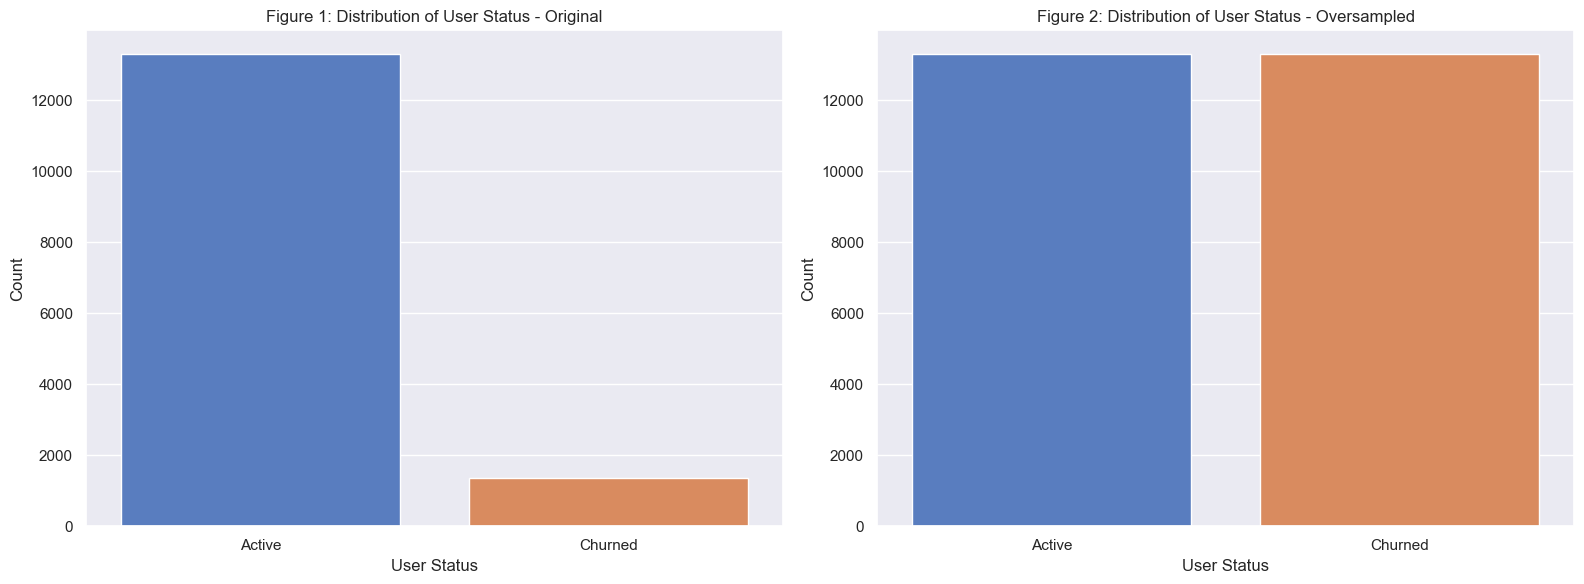

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

## INTRUCTIONS: replace with you session_data.csv filepath
path = "C:/Users/Luciano/Downloads/session_data.csv"
## EXECUTE 

session_data = pd.read_csv(path)
session_data = session_data.dropna()

session_data['session_created'] = pd.to_datetime(session_data['session_created'], format='%d-%b-%y')
session_data['subscription_start'] = pd.to_datetime(session_data['subscription_start'], format='%d-%b-%y')
session_data['subscription_end'] = pd.to_datetime(session_data['subscription_end'], format='%d-%b-%y')
session_data['remaining_days_sub'] = (session_data['subscription_end'] - session_data['session_created']).dt.days
session_data['churn'] = (session_data['subscription_end'] < '2023-04-07').astype(int)


session_data = pd.read_csv("C:/Users/Luciano/Downloads/session_data.csv")
session_data = session_data.dropna()

session_data['session_created'] = pd.to_datetime(session_data['session_created'], format='%d-%b-%y')
session_data['subscription_start'] = pd.to_datetime(session_data['subscription_start'], format='%d-%b-%y')
session_data['subscription_end'] = pd.to_datetime(session_data['subscription_end'], format='%d-%b-%y')
session_data['remaining_days_sub'] = (session_data['subscription_end'] - session_data['session_created']).dt.days
session_data['churn'] = (session_data['subscription_end'] < '2023-04-07').astype(int)

## Oversampling
majority_class = session_data[session_data['churn'] == 0]
minority_class = session_data[session_data['churn'] == 1]
minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class))
oversampled_data = pd.concat([majority_class, minority_oversampled])


# Set the seaborn style
sns.set(style="darkgrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the original distribution with color-coded labels
ax1 = sns.countplot(x='churn', data=session_data, palette='muted', ax=axes[0])
ax1.set(xlabel='User Status', ylabel='Count', title='Figure 1: Distribution of User Status - Original')

# Add color-coded labels to the x-axis ticks
ax1.set_xticklabels(['Active', 'Churned'])

# Plot the oversampled distribution with color-coded labels
ax2 = sns.countplot(x='churn', data=oversampled_data, palette='muted', ax=axes[1])
ax2.set(xlabel='User Status', ylabel='Count', title='Figure 2: Distribution of User Status - Oversampled')

# Add color-coded labels to the x-axis ticks
ax2.set_xticklabels(['Active', 'Churned'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Session Duration Distribution
In the following visualizations, we present a comparative analysis of the Session Duration Distribution between the original dataset and an oversampled version created to address class imbalance. Figure 1 illustrates the distribution of session durations in the original dataset, revealing a notable peak around 60 minutes, indicative of a common session duration for most users. The color-coded differentiation in the 'Churn' and 'Active' classes enhances visibility, with 'Churn' denoted in Orange and 'Active' in Blue. Turning our attention to Figure 2, the oversampled dataset showcases a distribution influenced by the balancing technique applied to 'Churn' and 'Active' classes. This results in an increased count of 'Churn' instances, contributing to a more balanced representation in the dataset."

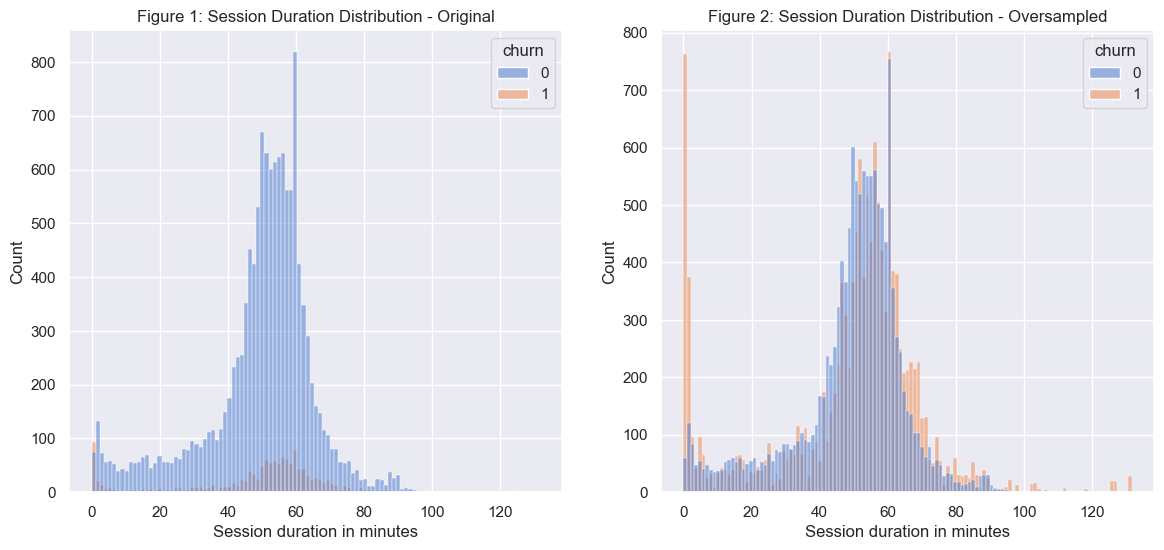

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the original distribution
ax3 = sns.histplot(x='session_duration_mins', data=session_data, hue='churn', palette='muted', ax=axes[0])
ax3.set(xlabel='Session duration in minutes', ylabel='Count', title='Figure 1: Session Duration Distribution - Original')

# Plot the oversampled distribution with color-coded labels
ax4 = sns.histplot(x='session_duration_mins', data=oversampled_data, hue='churn', palette='muted', ax=axes[1])
ax4.set(xlabel='Session duration in minutes', ylabel='Count', title='Figure 2: Session Duration Distribution - Oversampled')

# Show the plots
plt.show()


### Impact of Oversampling on Session Duration:

Comparing the two visualizations, we can discern the impact of oversampling on the session duration distribution. While the overall shape remains consistent, the oversampled dataset provides a more equitable representation of 'Churn' instances, aiding the machine learning algorithm in capturing patterns related to session duration for both user groups."

### Consideration for Machine Learning Model:

This oversampling strategy is particularly beneficial when training machine learning models, such as Random Forest, as it ensures that the model is exposed to a more balanced set of 'Churn' and 'Active' instances. This can enhance the model's ability to generalize patterns and make predictions for underrepresented classes.

### Implications for Decision-Making:

Understanding the distribution of session durations for both 'Churn' and 'Active' users is crucial for making informed decisions. The oversampled distribution aids in mitigating the impact of class imbalance, providing a more comprehensive view of user behavior in relation to session duration.

## Churn Predictor Model
### Choice of Random Forest Classifier

The Random Forest classifier was chosen for predicting customer churn due to its ability to handle non-linearity, capture complex interactions in the data, and mitigate overfitting. Random Forest is an ensemble learning method that combines multiple decision trees, providing robustness and high predictive accuracy.

### Feature Engineering and Selection

1. **Remaining Days Until Subscription End (session_data['remaining_days_sub']):**
   - This feature represents the days between session creation and the subscription end date.
   - Calculated to capture the temporal aspect of user engagement.
   - Provides valuable information about the user's remaining subscription period at the time of session creation.

2. **Feature Selection :**
   - Features such as session duration, upload source, and session approval status were considered.
   - Engineered features to highlight aspects influencing user behavior and potential churn.

In [4]:
# Split the data into features and target variable
features = ['session_approved','session_deleted','session_duration_mins','upload_from_phone','remaining_days_sub']

X_oversampled = oversampled_data[features]
y_oversampled = oversampled_data['churn']

# Split the oversampled data into training and testing sets
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.3)

# Model with Oversampling Data

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)
y_pred_os = clf.predict(X_test_os)

print(clf.score(X_test_os, y_test_os))

0.9746835443037974


### Model Evaluation Metrics

The model's performance was assessed using the following metrics from the latest Classification Report:

- **Precision:**
    - Precision measures the accuracy of positive predictions, indicating the proportion of correctly identified churned users among the predicted churn cases.
    - It's like asking, "When the model says that a churned user is churned, how often is it correct?"
- **Recall:**
    - Recall (Sensitivity) gauges the model's ability to capture all actual positive cases, revealing the proportion of correctly identified churned users among all true churn cases.
    - **This is the key metric** if we want to correctly predict churners.
    - It's like asking, "Out of all the actual churners, how many did the model catch?"
- **F1-Score:**
    - F1-Score represents the harmonic mean of precision and recall, providing a balanced measure of the model's overall accuracy.
    - It's a mix of precision and recall. If you care about both the model being right when it says "positive" and not missing too many positive things, then you look at the F1-Score.
- **ROC-AUC:**
  - Receiver Operating Characteristic - Area Under the Curve (ROC-AUC) assesses the model's ability to distinguish between classes (churned and active).
  - A higher ROC-AUC score indicates better discriminatory power, with 1.0 being the ideal score.
  - The curve rises toward the upper-left corner, and the more it hugs the upper-left corner, the better the model performance.


These metrics collectively offer insights into the model's effectiveness in identifying churned users while minimizing false positives and false negatives.

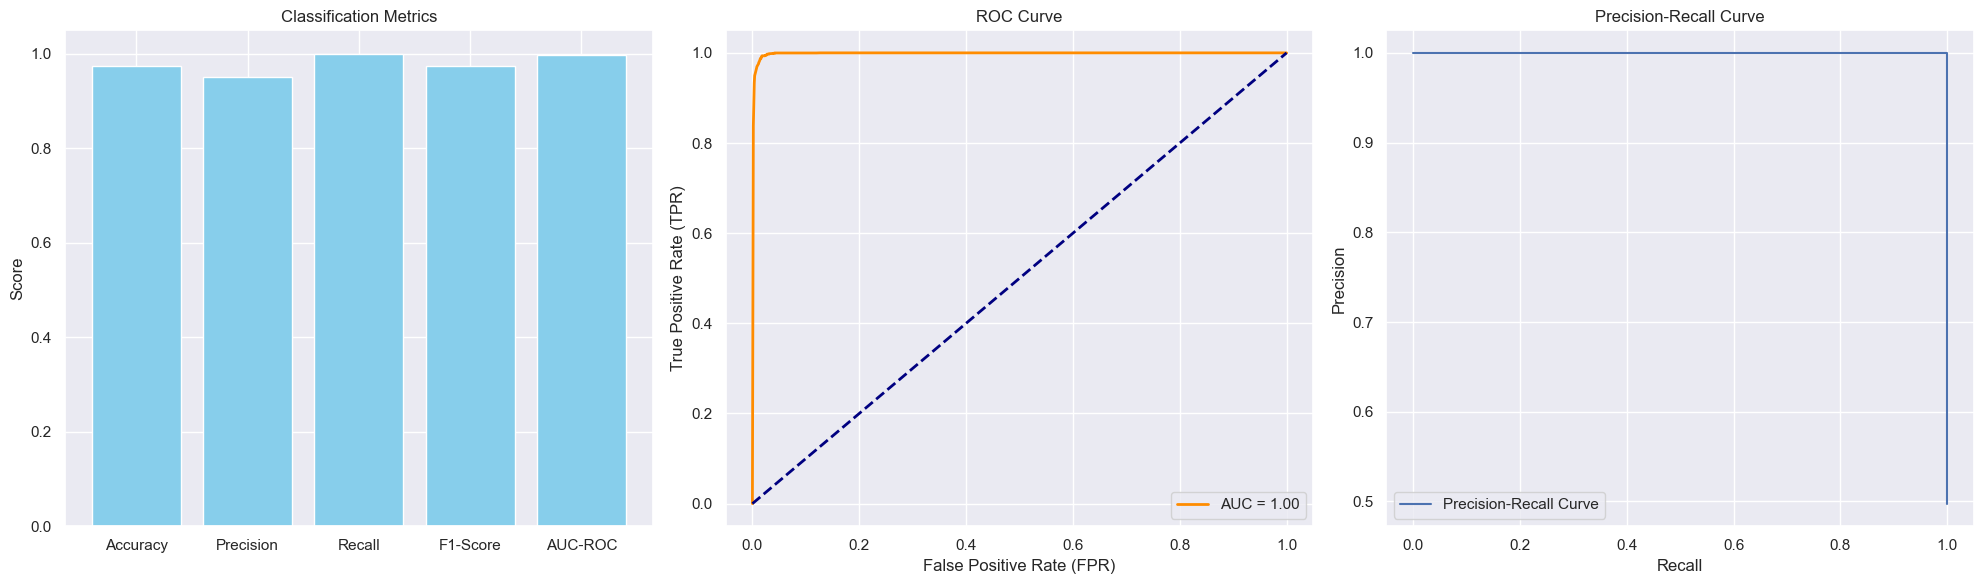

In [5]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

y_pred_prob_os = clf.predict_proba(X_test_os)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_os, y_pred_prob_os)
roc_auc = auc(fpr, tpr)

# Classification metrics calculation
f1 = f1_score(y_test_os, y_pred_os)
accuracy = accuracy_score(y_test_os, y_pred_os)
precision = precision_score(y_test_os, y_pred_os)
recall = recall_score(y_test_os, y_pred_os)
classification_rep = classification_report(y_test_os, y_pred_os)
conf_matrix = confusion_matrix(y_test_os, y_pred_os)
roc_auc = roc_auc_score(y_test_os, y_pred_prob_os)
y_true = y_test_os
y_scores = y_test_os

# Calculate precision and recall for different thresholds for Precision-Recall Curve
precision_pr, recall_pr, thresholds_pr = precision_recall_curve(y_true, y_scores)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot the classification metrics
ax1 = axes[0]
ax1.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'], [accuracy, precision, recall, f1, roc_auc], color='skyblue')
ax1.set(ylabel='Score', title='Classification Metrics')

# Plot the ROC curve
ax2 = axes[1]
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set(xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)', title='ROC Curve')
ax2.legend(loc="lower right")

# Plot the Precision-Recall Curve
ax3 = axes[2]
ax3.plot(recall_pr, precision_pr, color='b', label='Precision-Recall Curve')
ax3.set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curve')
ax3.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Based on the analysis of the customer churn predictor model, here are some actionable recommendations:

#### Early Intervention for At-Risk Customers:
* Utilize the model's predictions to identify customers at high risk of churn.
* Implement early intervention strategies for these customers, such as targeted communication, promotions, or personalized offers to encourage retention.

#### Improve User Engagement:
* Analyze the features contributing to **session approval** and **deletion**.
* Implement strategies to enhance user engagement during sessions, addressing factors that influence approval and minimizing session deletions.

#### Mobile User Experience Enhancement:
* Given that the source of session upload (mobile or not) is a significant feature, **consider enhancing the mobile user experience**.
* Optimize the platform for mobile users and provide incentives for mobile uploads to improve overall user satisfaction.

#### Subscription Renewal Reminders:
* Leverage subscription start and end dates to send timely subscription renewal reminders to users.
* Provide incentives or discounts for users approaching the end of their subscription period to **encourage renewals**.

#### User Status Monitoring:
* Continuously monitor user statuses to promptly **identify changes**.
* Establish a system for real-time monitoring and alerts for users who may be at **risk** of churning.

#### Feedback Mechanism:
* Implement a feedback mechanism for churned users to **gather insights** into the reasons behind their decision.
* Use feedback to make informed product improvements and address specific pain points.

#### A/B Testing for Feature Impact:
* Conduct A/B testing to assess the impact of specific features on user behavior and satisfaction.
* Use test results to iterate and optimize the platform based on user preferences.

#### Communication Strategy:
* Tailor communication strategies based on user segments identified by the model.
* Implement personalized communication to strengthen the relationship with users and address individual needs.

#### Regular Model Updates:
* Regularly update the churn predictor model with **new data** to ensure its accuracy and relevance.
* Monitor its performance over time and refine it as needed to adapt to changing user behavior.

#### Collaboration with Product Team:
* Collaborate closely with the product team to implement **product enhancements** informed by the model's insights.
* Align product development with user needs and preferences identified through the analysis.